# 1D grating

In [2]:
from src.Grating1D import *
from torch import optim
# plt settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
print(even_case_step2(3))
print(odd_case_step2(3))
print(odd_case_step1(3))

[-5, -3, -1, 1, 3, 5]
[-4, -2, 0, 2, 4]
[-3, -2, -1, 0, 1, 2, 3]


## Constrained Optimization

In [32]:
# momentum SGD
co = ConstrainedOptimGrating1D([-1, 1], alpha=0.3)
solver = Solver(co)
solver.set_optim(
    optim.SGD, 
    lr=1, 
    momentum=0.9
)

Epoch: 0 Loss: 0.29999861121177673
Epoch: 1 Loss: 0.29999861121177673
Epoch: 2 Loss: 0.29999861121177673
Epoch: 3 Loss: 0.29999861121177673
Epoch: 4 Loss: 0.29999861121177673
Epoch: 5 Loss: 0.29999861121177673
Epoch: 6 Loss: 0.29999861121177673
Epoch: 7 Loss: 0.29999858140945435
Epoch: 8 Loss: 0.29999858140945435
Epoch: 9 Loss: 0.29999855160713196
Epoch: 10 Loss: 0.29999855160713196
Epoch: 11 Loss: 0.29999855160713196
Epoch: 12 Loss: 0.29999852180480957
Epoch: 13 Loss: 0.29999852180480957
Epoch: 14 Loss: 0.29999852180480957
Epoch: 15 Loss: 0.2999984920024872
Epoch: 16 Loss: 0.2999984622001648
Epoch: 17 Loss: 0.2999984622001648
Epoch: 18 Loss: 0.2999984323978424
Epoch: 19 Loss: 0.2999984323978424
Epoch: 20 Loss: 0.2999984323978424
Epoch: 21 Loss: 0.29999840259552
Epoch: 22 Loss: 0.29999837279319763
Epoch: 23 Loss: 0.29999837279319763
Epoch: 24 Loss: 0.29999834299087524
Epoch: 25 Loss: 0.29999834299087524
Epoch: 26 Loss: 0.29999831318855286
Epoch: 27 Loss: 0.29999828338623047
Epoch: 28 L

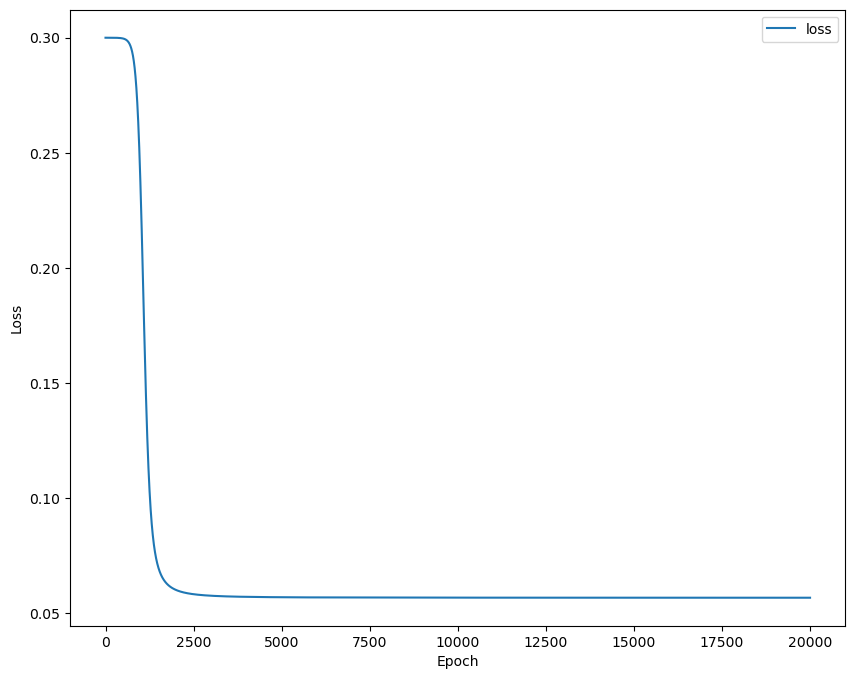

In [33]:
solver.train(
    step=20000,
    verbose=True
)

Calculate Energy Efficiency:
Energy Efficiency = 0.8105385303497314


energy of some order:
order 0: 4.6321777297939765e-05
order -1: 0.4052896347985211
order 1: 0.405248882114595
order -2: 4.627143721433816e-05
order 2: 4.632805271566429e-05
order -3: 0.045051312537162325
order 3: 0.04498114435677025
order -4: 4.6177211925511755e-05
order 4: 4.629036856641788e-05
order -5: 0.016223746999984634
order 5: 0.016168228795322648
order -6: 4.603950114548936e-05
order 6: 4.620900008728648e-05




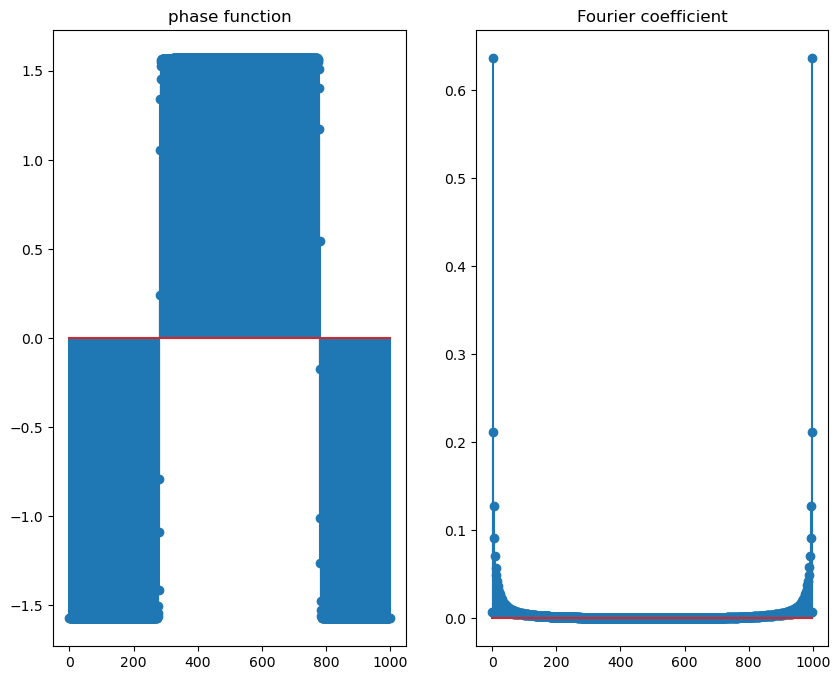

In [34]:
co.visualize()

In [9]:
# Nesteov_momentum
co2 = ConstrainedOptimGrating1D(orders=[-1, 0, 1])
solver = Solver(co2)
solver.set_optim(
    optim.SGD, lr=10, momentum=0.9, nesterov=True
)

Epoch: 0 Loss: 0.16836673021316528
Epoch: 1 Loss: 0.1683645248413086
Epoch: 2 Loss: 0.16836141049861908
Epoch: 3 Loss: 0.1683574616909027
Epoch: 4 Loss: 0.16835279762744904
Epoch: 5 Loss: 0.16834743320941925
Epoch: 6 Loss: 0.16834145784378052
Epoch: 7 Loss: 0.1683349758386612
Epoch: 8 Loss: 0.16832804679870605
Epoch: 9 Loss: 0.1683206856250763
Epoch: 10 Loss: 0.1683129370212555
Epoch: 11 Loss: 0.16830487549304962
Epoch: 12 Loss: 0.16829656064510345
Epoch: 13 Loss: 0.16828800737857819
Epoch: 14 Loss: 0.16827918589115143
Epoch: 15 Loss: 0.16827020049095154
Epoch: 16 Loss: 0.1682610809803009
Epoch: 17 Loss: 0.16825179755687714
Epoch: 18 Loss: 0.168242409825325
Epoch: 19 Loss: 0.16823293268680573
Epoch: 20 Loss: 0.16822336614131927
Epoch: 21 Loss: 0.16821368038654327
Epoch: 22 Loss: 0.16820400953292847
Epoch: 23 Loss: 0.1681942641735077
Epoch: 24 Loss: 0.16818448901176453
Epoch: 25 Loss: 0.16817474365234375
Epoch: 26 Loss: 0.168164923787117
Epoch: 27 Loss: 0.16815514862537384
Epoch: 28 Los

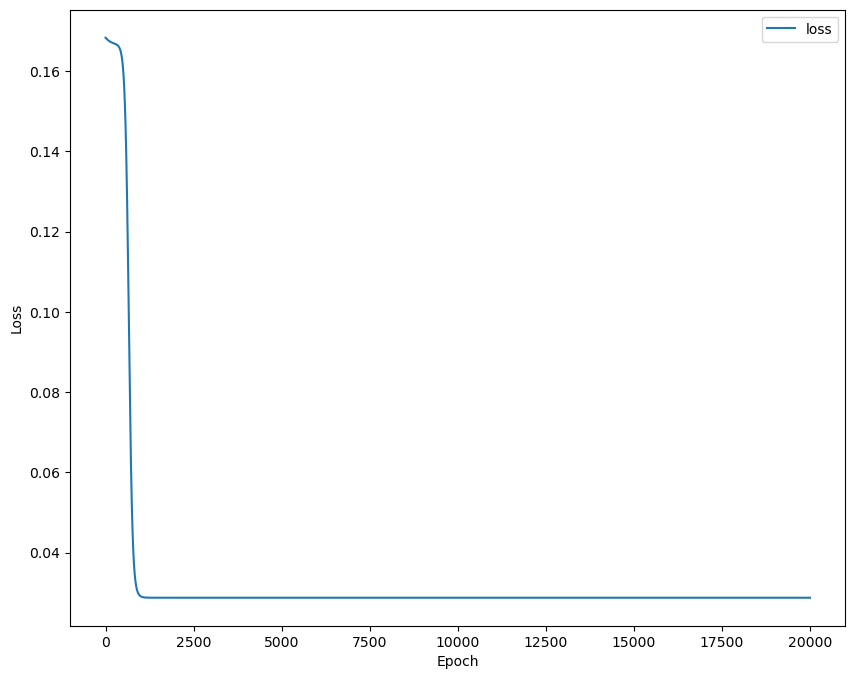

In [8]:
solver.train(
    step=20000,
    verbose=True
)

Calculate Energy Efficiency:
Energy Efficiency = 0.9547326564788818


energy of some order:
order 0: 0.44590025288825075
order -1: 0.2544161881723461
order 1: 0.2544162483011405
order -2: 0.014445151237616694
order 2: 0.014445151237616694
order -3: 0.006585159705860599
order 3: 0.0065851584966463705
order -4: 0.0010300486225257727
order 4: 0.0010300486225257727
order -5: 0.0004333211400559117
order 5: 0.00043332067477397374
order -6: 9.017441643702998e-05
order 6: 9.017439874931324e-05




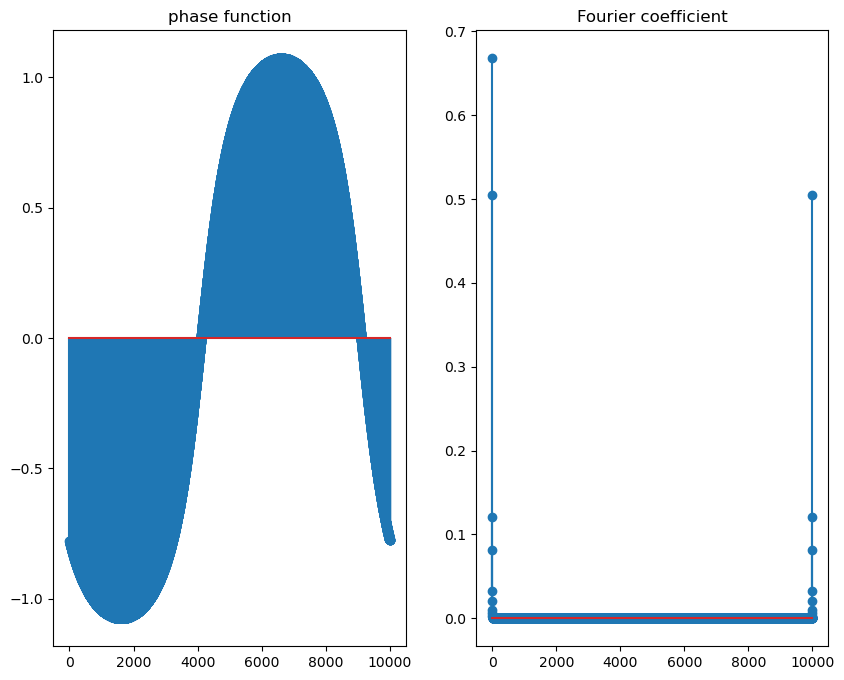

In [9]:
co2.visualize()

## Least Squares Optimization

In [22]:
lso = LeastSquaresOptimGrating1D(odd_case_step1(2))
lso.forward()

tensor(1.1098, grad_fn=<DivBackward0>)

In [23]:
solver = Solver(lso)
solver.set_optim(
    optim.SGD, 
    lr=0.5,
    momentum=0.9
)

Epoch: 0 Loss: 1.1097569465637207
Epoch: 1 Loss: 1.1097514629364014
Epoch: 2 Loss: 1.109742522239685
Epoch: 3 Loss: 1.1097315549850464
Epoch: 4 Loss: 1.1097126007080078
Epoch: 5 Loss: 1.10969078540802
Epoch: 6 Loss: 1.109664797782898
Epoch: 7 Loss: 1.1096413135528564
Epoch: 8 Loss: 1.1096112728118896
Epoch: 9 Loss: 1.1095805168151855
Epoch: 10 Loss: 1.1095452308654785
Epoch: 11 Loss: 1.1095045804977417
Epoch: 12 Loss: 1.1094688177108765
Epoch: 13 Loss: 1.1094303131103516
Epoch: 14 Loss: 1.1093848943710327
Epoch: 15 Loss: 1.1093356609344482
Epoch: 16 Loss: 1.1092851161956787
Epoch: 17 Loss: 1.1092331409454346
Epoch: 18 Loss: 1.1091748476028442
Epoch: 19 Loss: 1.1091176271438599
Epoch: 20 Loss: 1.10905122756958
Epoch: 21 Loss: 1.1089726686477661
Epoch: 22 Loss: 1.1088967323303223
Epoch: 23 Loss: 1.1088124513626099
Epoch: 24 Loss: 1.1087195873260498
Epoch: 25 Loss: 1.1086183786392212
Epoch: 26 Loss: 1.1085067987442017
Epoch: 27 Loss: 1.1083862781524658
Epoch: 28 Loss: 1.1082619428634644
E

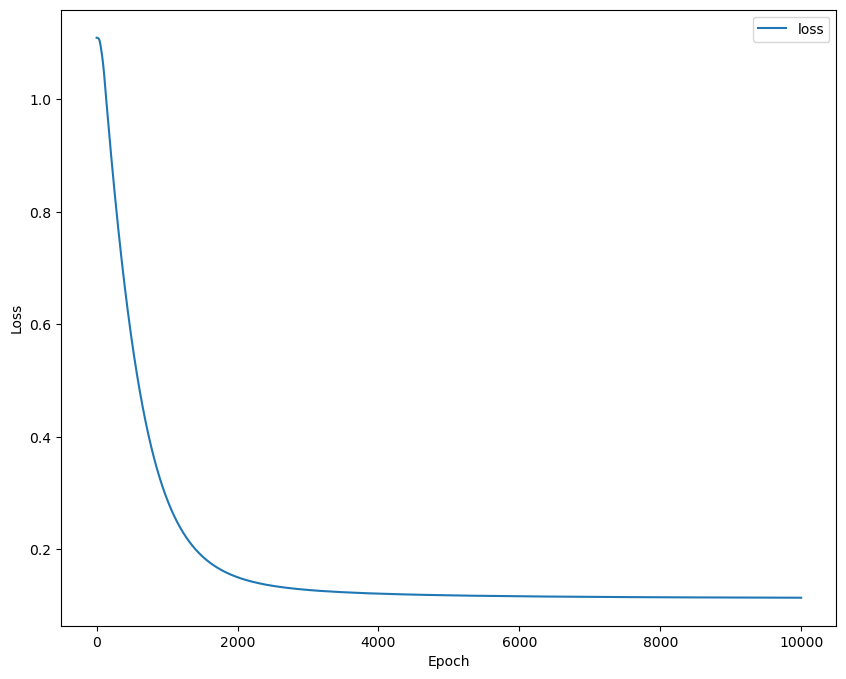

In [24]:
solver.train(
    step=10000,
    verbose=True
)

learned a_k of target order
a_-2 = 0.8738530874252319
a_-1 = -0.8561297655105591
a_0 = -0.03815823420882225
a_1 = 0.8200992345809937
a_2 = -0.9098403453826904


Calculate Energy Efficiency:
Energy Efficiency = 0.9076893925666809


energy of some order:
order 0: 0.293652744992702
order -1: 0.15477656130384787
order 1: 0.15480355279994118
order -2: 0.15222670489095336
order 2: 0.15222984439852727
order -3: 0.01024126948600218
order 3: 0.01024444102387534
order -4: 0.007090916444157935
order 4: 0.0070906416476535505
order -5: 0.013816892116857993
order 5: 0.013822333001220821
order -6: 0.002850317873830957
order 6: 0.0028505525655231484




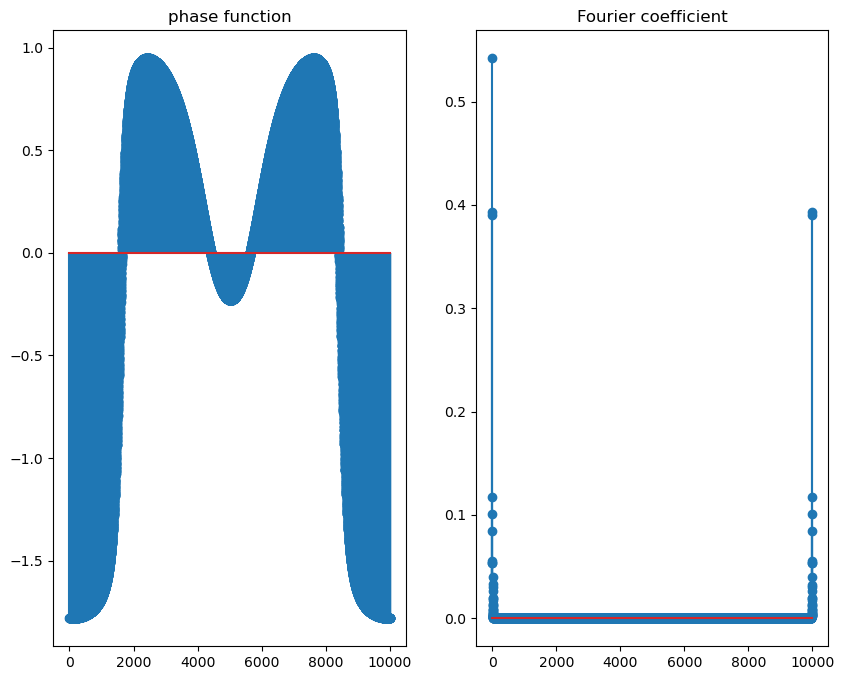

In [25]:
lso.visualize()

## Minimum Variance Optimization

In [22]:
mvo = MinimumVarianceOptimGrating1D([-1, 0, 1])
solver = Solver(mvo)
solver.set_optim(optim.SGD, lr=0.001, momentum=0.9)

Epoch: 0 Loss: 1.0929213762283325
Epoch: 1 Loss: 1.092889666557312
Epoch: 2 Loss: 1.0928291082382202
Epoch: 3 Loss: 1.092742681503296
Epoch: 4 Loss: 1.092632532119751
Epoch: 5 Loss: 1.0925008058547974
Epoch: 6 Loss: 1.0923491716384888
Epoch: 7 Loss: 1.0921794176101685
Epoch: 8 Loss: 1.0919928550720215
Epoch: 9 Loss: 1.0917905569076538
Epoch: 10 Loss: 1.0915738344192505
Epoch: 11 Loss: 1.0913435220718384
Epoch: 12 Loss: 1.0911004543304443
Epoch: 13 Loss: 1.0908454656600952
Epoch: 14 Loss: 1.0905791521072388
Epoch: 15 Loss: 1.0903019905090332
Epoch: 16 Loss: 1.0900145769119263
Epoch: 17 Loss: 1.0897173881530762
Epoch: 18 Loss: 1.089410662651062
Epoch: 19 Loss: 1.089094877243042
Epoch: 20 Loss: 1.0887702703475952
Epoch: 21 Loss: 1.0884369611740112
Epoch: 22 Loss: 1.0880954265594482
Epoch: 23 Loss: 1.0877456665039062
Epoch: 24 Loss: 1.0873879194259644
Epoch: 25 Loss: 1.087022304534912
Epoch: 26 Loss: 1.0866488218307495
Epoch: 27 Loss: 1.0862675905227661
Epoch: 28 Loss: 1.0858787298202515
E

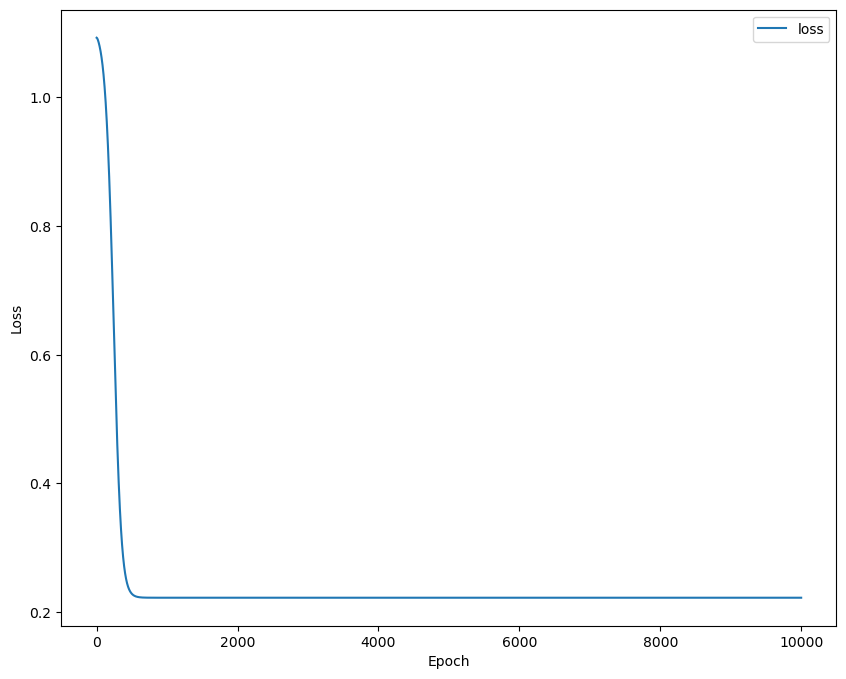

In [23]:
solver.train(
    step=10000,
    verbose=True
)

learned a_k of target order
a_-1 = 0.025592148303985596
a_0 = 1.7439008951187134
a_1 = -3.116015672683716


Calculate Energy Efficiency:
Energy Efficiency = 0.9485759735107422


energy of some order:
order 0: 0.41302906464899536
order -1: 0.2677273976799235
order 1: 0.2678194964139493
order -2: 0.015678966369386593
order 2: 0.015656666094002958
order -3: 0.007925070916837085
order 3: 0.007925337554443246
order -4: 0.0013057233630375809
order 4: 0.0012991829402189126
order -5: 0.0006020250125445027
order 5: 0.0006012004612199508
order -6: 0.00013356682660701016
order 6: 0.0001318662112404995




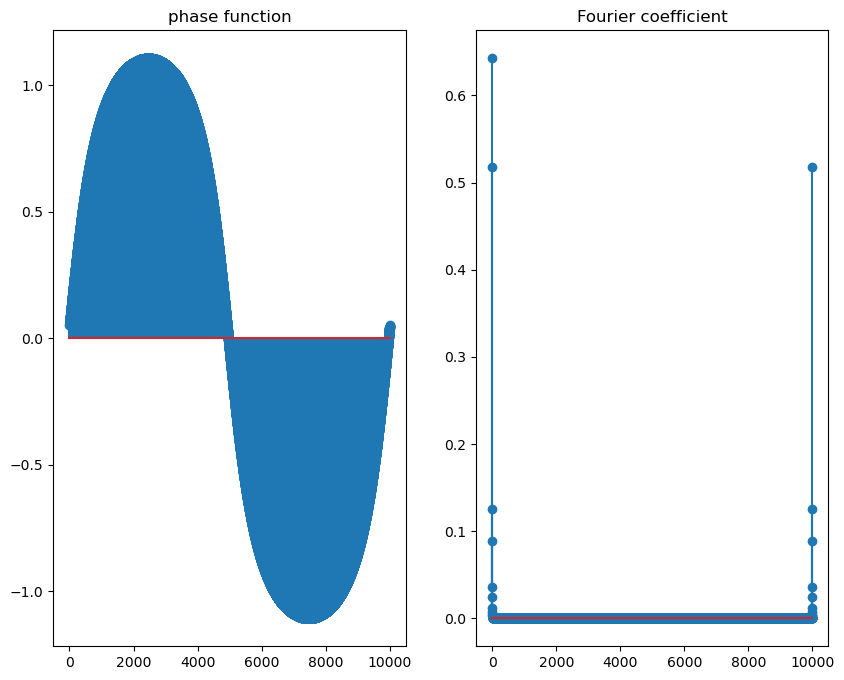

In [24]:
mvo.visualize()

In [141]:

class MinimumVarianceOptimSymmetricGrating1D(Grating1D):
    def __init__(self, orders, segment=10000) -> None:
        super().__init__(orders)

        self.M = self.orders.shape[0] // 2
        a_vec = torch.randn(self.M) * 0.01
        a_vec.requires_grad = True
        mu_vec = torch.ones(self.M)
        mu_vec.requires_grad = True

        self.params["a_vec"] = a_vec
        self.params["mu_vec"] = mu_vec
        self.segment = segment

    def sum_of_fourier_orders(self):
        x_vec = torch.linspace(-torch.pi, torch.pi, self.segment)

        _exp_x = torch.exp(1j * x_vec.unsqueeze(1) * torch.arange(1, self.M+1))
        _exp = _exp_x*torch.exp(1j * self.params["a_vec"]) + _exp_x.conj()*torch.exp(1j * self.params["a_vec"])

        approx = torch.sum(_exp, dim=1) +1
        return approx

    def forward(self):
        """forward function, compute loss

        Returns:
            scale: loss 
        """

        loss = 0

        approx = self.sum_of_fourier_orders()
        hx = approx / torch.abs(approx)
        coeff = torch.fft.fft(hx) / self.segment

        loss = torch.var(coeff[torch.arange(-self.M, self.M+1)])

        return loss

    def get_p_vec(self):
        """construct p_vec from a_vec

        Returns:
            p_vec: p_vec
        """

        p_vec = torch.angle(self.sum_of_fourier_orders())

        return p_vec.detach()

    def visualize(self):

        print("learned a_k of target order")
        for order in range(self.M):
            print(f"a_{order+1} = {self.params['a_vec'][order].item()}")
        print("\n")

        print("learned mu_k of target order")
        for order in range(self.M):
            print(f"mu_{order+1} = {self.params['mu_vec'][order].item()}")
        print("\n")

        return super().visualize()

In [148]:
mvo_0 = MinimumVarianceOptimSymmetricGrating1D(orders=odd_case_step1(2))
solver = Solver(mvo_0)
solver.set_optim(optim.SGD, lr=0.1, momentum=0.9)


Epoch: 0 Loss: 0.13098226487636566
Epoch: 1 Loss: 0.1309816837310791
Epoch: 2 Loss: 0.13098083436489105
Epoch: 3 Loss: 0.13098005950450897
Epoch: 4 Loss: 0.1309795081615448
Epoch: 5 Loss: 0.13097700476646423
Epoch: 6 Loss: 0.1309833973646164
Epoch: 7 Loss: 0.13098570704460144
Epoch: 8 Loss: 0.13098540902137756
Epoch: 9 Loss: 0.1309700906276703
Epoch: 10 Loss: 0.1309729367494583
Epoch: 11 Loss: 0.1309836208820343
Epoch: 12 Loss: 0.13099007308483124
Epoch: 13 Loss: 0.13097240030765533
Epoch: 14 Loss: 0.13098154962062836
Epoch: 15 Loss: 0.13098368048667908
Epoch: 16 Loss: 0.13098685443401337
Epoch: 17 Loss: 0.13098973035812378
Epoch: 18 Loss: 0.1309916228055954
Epoch: 19 Loss: 0.1309923231601715
Epoch: 20 Loss: 0.13099204003810883
Epoch: 21 Loss: 0.13099117577075958
Epoch: 22 Loss: 0.13099028170108795
Epoch: 23 Loss: 0.1309896856546402
Epoch: 24 Loss: 0.13098964095115662
Epoch: 25 Loss: 0.13099002838134766
Epoch: 26 Loss: 0.13099056482315063
Epoch: 27 Loss: 0.1309908926486969
Epoch: 28 Lo

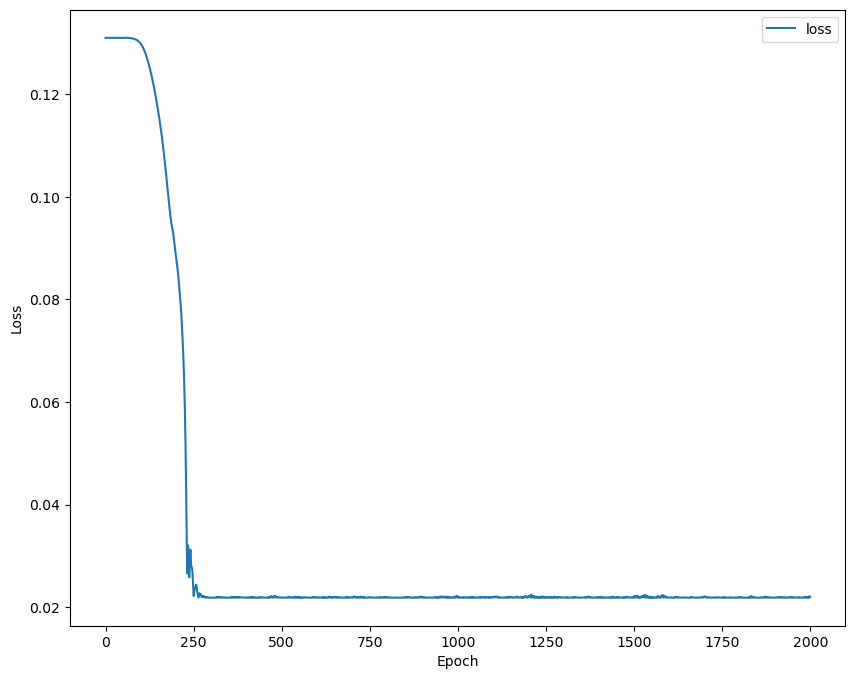

In [149]:

solver.train(
    step=2000,
    verbose=True
)

learned a_k of target order
a_1 = -3.146406412124634
a_2 = -0.002410391578450799


learned mu_k of target order
mu_1 = 1.0
mu_2 = 1.0


Calculate Energy Efficiency:
Energy Efficiency = 0.6269516944885254


energy of some order:
order 0: 0.04013769893585484
order -1: 0.05357907315578814
order 1: 0.053579059359010195
order -2: 0.23982797156743008
order 2: 0.23982791318798125
order -3: 0.10667599922939619
order 3: 0.10667601869704413
order -4: 0.003365083252717796
order 4: 0.003365083252717796
order -5: 6.132708120500877e-05
order 5: 6.132705203166448e-05
order -6: 0.001521001515627285
order 6: 0.0015210020967729165




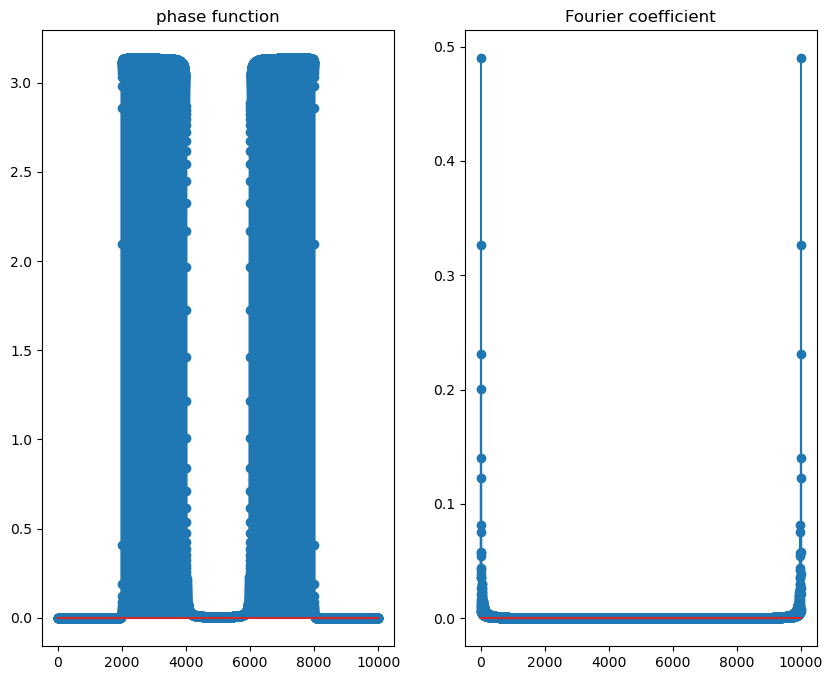

In [150]:
mvo_0.visualize()

In [139]:
mvo_0.forward()

tensor(0.1732, grad_fn=<VarBackward0>)